In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    w1 = np.random.randn(input_size, hidden_size)
    w2 = np.random.randn(hidden_size, output_size)
    return w1, w2

def forward_pass(x, w1, w2):
    z1 = x @ w1
    a1 = sigmoid(z1)
    z2 = a1 @ w2
    a2 = sigmoid(z2)
    return a1, a2

def backward_pass(x, y, a1, a2, w1, w2, lr):
    d2 = (a2 - y) * sigmoid_derivative(a2)
    d1 = (d2 @ w2.T) * sigmoid_derivative(a1)
    w2 -= a1.T @ d2 * lr
    w1 -= x.T @ d1 * lr
    return w1, w2

def compute_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def compute_accuracy(y_pred, y_true):
    pred_labels = (y_pred >= 0.5).astype(int)
    return np.mean(pred_labels == y_true)

def train_neural_net(x_train, y_train, x_test, y_test, hidden_size=8, lr=0.1, epochs=100):
    input_size = x_train.shape[1]
    output_size = 1
    w1, w2 = initialize_weights(input_size, hidden_size, output_size)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        a1, a2 = forward_pass(x_train, w1, w2)
        w1, w2 = backward_pass(x_train, y_train, a1, a2, w1, w2, lr)

        train_loss = compute_loss(a2, y_train)
        train_acc = compute_accuracy(a2, y_train)
        a1_test, a2_test = forward_pass(x_test, w1, w2)
        test_loss = compute_loss(a2_test, y_test)
        test_acc = compute_accuracy(a2_test, y_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return w1, w2, train_losses, test_losses, train_accuracies, test_accuracies


In [6]:
    df = pd.read_csv("heart_cleveland_upload.csv")


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [17]:
df.oldpeak.max()

np.float64(6.2)

In [20]:
df.rename(columns={"chol": "cholestrol"}, inplace=True)
df.rename(columns={"thal": "Thalassemia"}, inplace=True)
df.rename(columns={"thal": "Thalassemia"}, inplace=True)
df.rename(columns={"exang": "exercise-induced angina"}, inplace=True)
df.rename(columns={"fbs": "fasting blood sugar"}, inplace=True)
df.rename(columns={"trestbps": "resting blood pressure"}, inplace=True)
df

,age,sex,cp,resting blood pressure,cholestrol,fasting blood sugar,restecg,thalach,exercise-induced angina,oldpeak,slope,ca,Thalassemia,condition
0,66,0,3,178,228,1,0,165,1,1.0,1,2,2,1
1,59,1,3,140,177,0,0,162,1,0.0,0,1,2,1
2,41,1,1,135,203,0,0,132,0,0.0,1,0,1,0
3,37,0,2,120,215,0,0,170,0,0.0,0,0,0,0
4,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,62,0,3,140,394,0,2,157,0,1.2,1,0,0,0
293,29,1,1,130,204,0,2,202,0,0.0,0,0,0,0
294,56,1,2,130,256,1,2,142,1,0.6,1,1,1,1
295,47,1,3,110,275,0,2,118,1,1.0,1,1,0,1


In [21]:
df.shape

(297, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    x = df.drop(columns="condition").values
    y = df["condition"].values.reshape(-1, 1)

    x = (x - np.min(x, axis=0)) / (np.ptp(x, axis=0) + 1e-8)

    split = int(0.7 * len(df))
    x_train, x_test = x[:split], x[split:]
    y_train, y_test = y[:split], y[split:]

    w1, w2, train_losses, test_losses, train_accs, test_accs = train_neural_net(x_train, y_train, x_test, y_test)

Epoch 1 | Train Loss: 0.3586 | Test Loss: 0.3390 | Train Acc: 0.4783 | Test Acc: 0.5778
Epoch 2 | Train Loss: 0.3934 | Test Loss: 0.2552 | Train Acc: 0.5217 | Test Acc: 0.4778
Epoch 3 | Train Loss: 0.2518 | Test Loss: 0.2712 | Train Acc: 0.5411 | Test Acc: 0.5778
Epoch 4 | Train Loss: 0.3229 | Test Loss: 0.4202 | Train Acc: 0.5217 | Test Acc: 0.4222
Epoch 5 | Train Loss: 0.3832 | Test Loss: 0.2064 | Train Acc: 0.4783 | Test Acc: 0.6333
Epoch 6 | Train Loss: 0.2489 | Test Loss: 0.4260 | Train Acc: 0.5362 | Test Acc: 0.4222
Epoch 7 | Train Loss: 0.3898 | Test Loss: 0.1519 | Train Acc: 0.4783 | Test Acc: 0.8222
Epoch 8 | Train Loss: 0.1670 | Test Loss: 0.2333 | Train Acc: 0.7585 | Test Acc: 0.6222
Epoch 9 | Train Loss: 0.2103 | Test Loss: 0.2475 | Train Acc: 0.6667 | Test Acc: 0.6111
Epoch 10 | Train Loss: 0.3075 | Test Loss: 0.2753 | Train Acc: 0.5314 | Test Acc: 0.5667
Epoch 11 | Train Loss: 0.2440 | Test Loss: 0.1831 | Train Acc: 0.5990 | Test Acc: 0.7444
Epoch 12 | Train Loss: 0.2230 

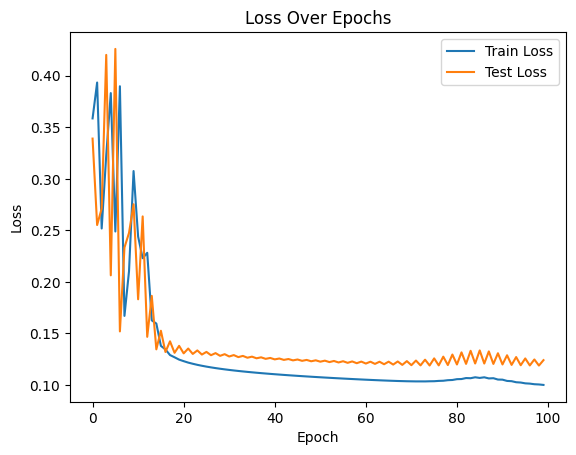

In [10]:
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

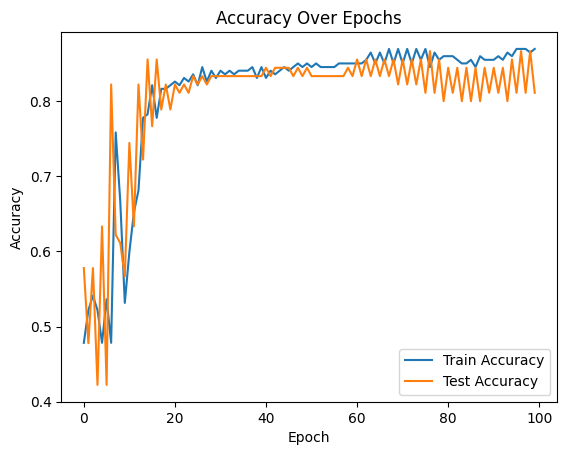

In [11]:
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [12]:
    # Final metrics
    _, y_pred = forward_pass(x_test, w1, w2)
    y_pred = (y_pred >= 0.5).astype(int)
    y_true = y_test

    tp = np.sum((y_pred == 1) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    acc = np.mean(y_pred == y_true)

In [13]:
    print("\n=== Final Evaluation on Test Set ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")


=== Final Evaluation on Test Set ===
Accuracy : 0.8111
Precision: 0.7692
Recall   : 0.7895
F1 Score : 0.7792


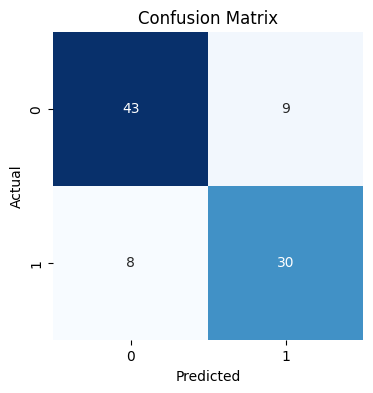

In [14]:
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

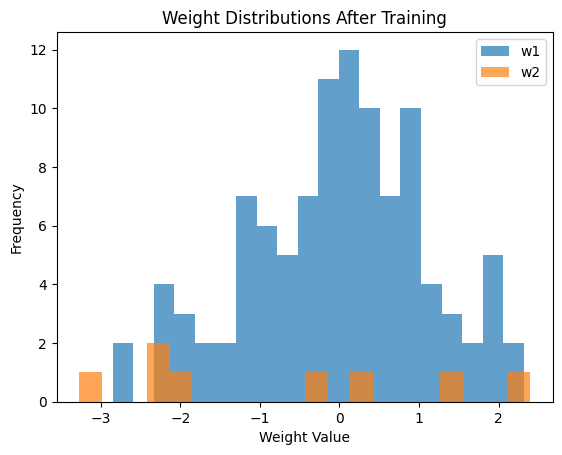

In [15]:
    plt.hist(w1.flatten(), bins=20, alpha=0.7, label='w1')
    plt.hist(w2.flatten(), bins=20, alpha=0.7, label='w2')
    plt.title("Weight Distributions After Training")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

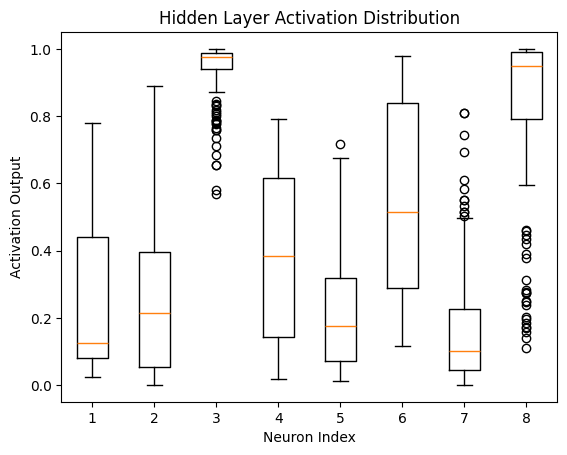

In [16]:
a1_train, _ = forward_pass(x_train, w1, w2)
plt.boxplot(a1_train)
plt.title("Hidden Layer Activation Distribution")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Output")
plt.show()